<a href="https://colab.research.google.com/github/jean-mb/analises-cyberattacks/blob/main/Mensal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-28-2ab264195c2e>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barras = sns.barplot(
<ipython-input-28-2ab264195c2e>:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barras.set_yticklabels(barras.get_yticklabels(), fontsize=14)


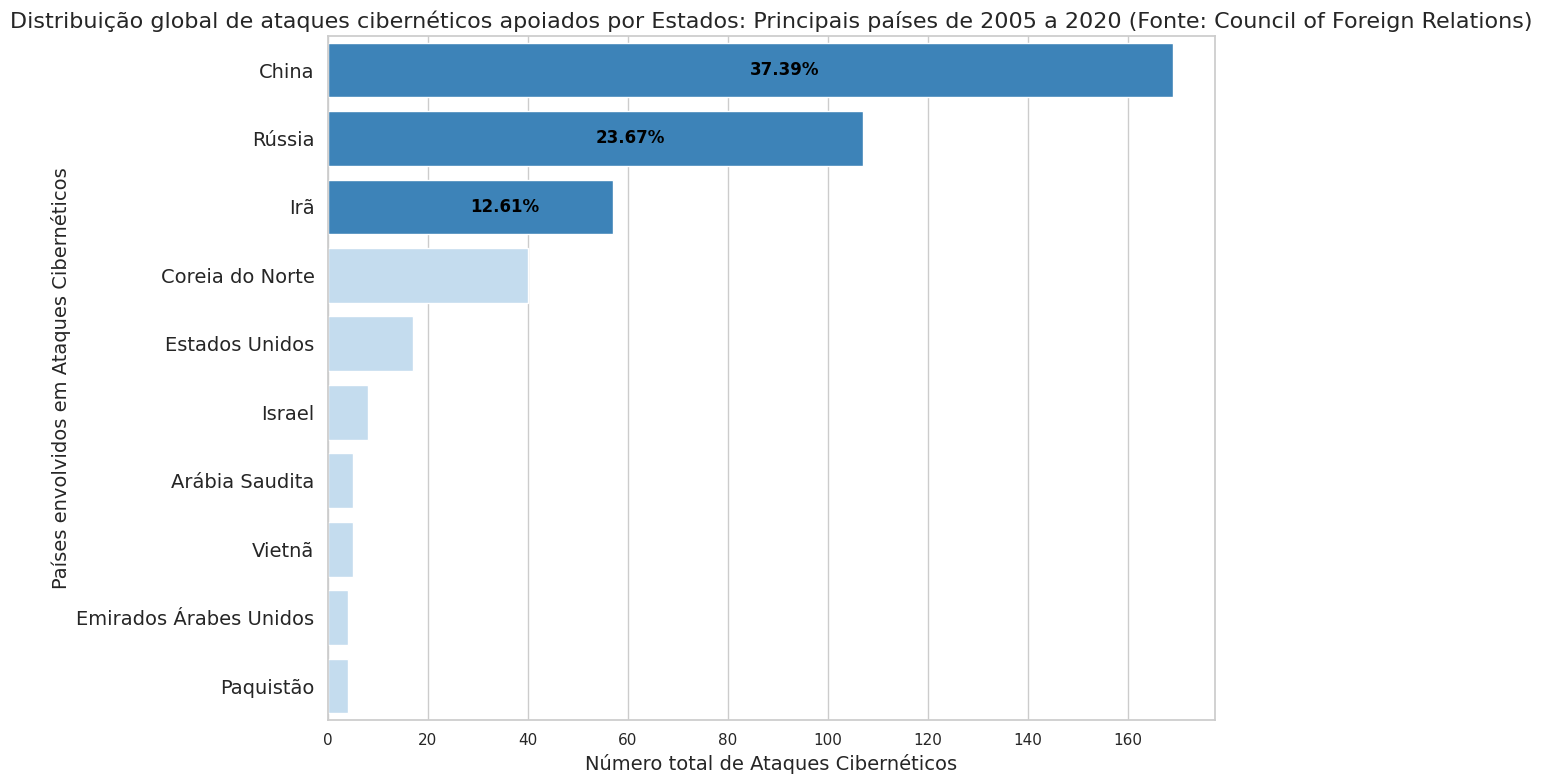

              Patrocinador  Total_Ataques
0           Arábia Saudita              5
1                Austrália              3
2                   Canada              1
3              Cazaquistão              1
4                    China            169
5          Coreia do Norte             40
6            Coreia do Sul              3
7                    Egito              1
8   Emirados Árabes Unidos              4
9                  Espanha              1
10          Estados Unidos             17
11                 Etiópia              1
12                  França              1
13               Hong Kong              1
14               Indonésia              1
15                     Irã             57
16                  Israel              8
17                  Líbano              1
18                Marrocos              1
19                  México              2
20             New Zealand              1
21               Palestine              2
22                  Panamá        

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub

# DATASET: https://www.kaggle.com/datasets/fireballbyedimyrnmom/cyber-incidents-up-to-2020
caminho_dados = kagglehub.dataset_download("fireballbyedimyrnmom/cyber-incidents-up-to-2020", path='cyber-operations-incidents.csv')
dados = pd.read_csv(caminho_dados)

dados['Patrocinador'] = dados['Sponsor'].fillna('Desconhecido')
dados['Patrocinador'] = dados['Patrocinador'].str.split(', ')
dados = dados.explode('Patrocinador')

traducao_paises = {
    'Russian Federation': 'Rússia',
    "Korea (Democratic People's Republic of)": 'Coreia do Norte',
    'Australia': 'Austrália',
    'Palestine, State of': 'Palestina',
    'Iran (Islamic Republic of)': 'Irã',
    'Saudi Arabia': 'Arábia Saudita',
    'Syrian Arab Republic': 'Síria',
    'China': 'China',
    'Turkey': 'Turquia',
    'Vietnam': 'Vietnã',
    'Pakistan': 'Paquistão',
    'Israel': 'Israel',
    'Korea (Republic of)': 'Coreia do Sul',
    'Togo': 'Togo',
    'United States of America': 'Estados Unidos',
    'United Arab Emirates': 'Emirados Árabes Unidos',
    'United States': 'Estados Unidos',
    'Hong Kong': 'Hong Kong',
    'China, Russian Federation': 'China',
    'Egypt': 'Egito',
    'Uzbekistan': 'Uzbequistão',
    'Morocco': 'Marrocos',
    'Netherlands': 'Países Baixos',
    'United Kingdom': 'Reino Unido',
    'Lebanon': 'Líbano',
    'Mexico': 'México',
    'Ethiopia': 'Etiópia',
    'Panama': 'Panamá',
    'Indonesia': 'Indonésia',
    'Kazakhstan': 'Cazaquistão',
    'Uganda': 'Uganda',
    'Spain': 'Espanha',
    'France': 'França',
    'India': 'Índia',
    'Taiwan': 'Taiwan',
    'Desconhecido': 'Desconhecido'
}

dados['Patrocinador'] = dados['Patrocinador'].replace(traducao_paises)
dados = dados[dados['Patrocinador'] != 'Desconhecido'] # tira nulos

ataques_por_pais = dados.groupby('Patrocinador').size().reset_index(name='Total_Ataques')

total_ataques = ataques_por_pais['Total_Ataques'].sum()
top_10_paises = ataques_por_pais.nlargest(10, 'Total_Ataques')
top_10_paises['Porcentagem'] = (top_10_paises['Total_Ataques'] / total_ataques * 100).round(2)

# barras
plt.figure(figsize=(12, 8))
barras = sns.barplot(
    x='Total_Ataques',
    y='Patrocinador',
    data=top_10_paises,
    palette={pais: '#2986cc' if i < 3 else '#bdddf5' for i, pais in enumerate(top_10_paises['Patrocinador'])}
)
barras.set_yticklabels(barras.get_yticklabels(), fontsize=14)

# porcentagem dos top 3
for i, (pais, porcentagem, total) in enumerate(zip(top_10_paises['Patrocinador'], top_10_paises['Porcentagem'], top_10_paises['Total_Ataques'])):
    if i < 3:
        barras.text(
            total - total / 2, # bota na metade da barra
            i,
            f"{porcentagem}%",
            color="black",
            va="center",
            fontweight="bold",
            fontsize=12
        )

plt.title('Distribuição global de ataques cibernéticos apoiados por Estados: Principais países de 2005 a 2020 (Fonte: Council of Foreign Relations)', fontsize=16)
plt.xlabel('Número total de Ataques Cibernéticos', fontsize=14)
plt.ylabel('Países envolvidos em Ataques Cibernéticos', fontsize=14)
plt.tight_layout()
plt.show()

print(ataques_por_pais)


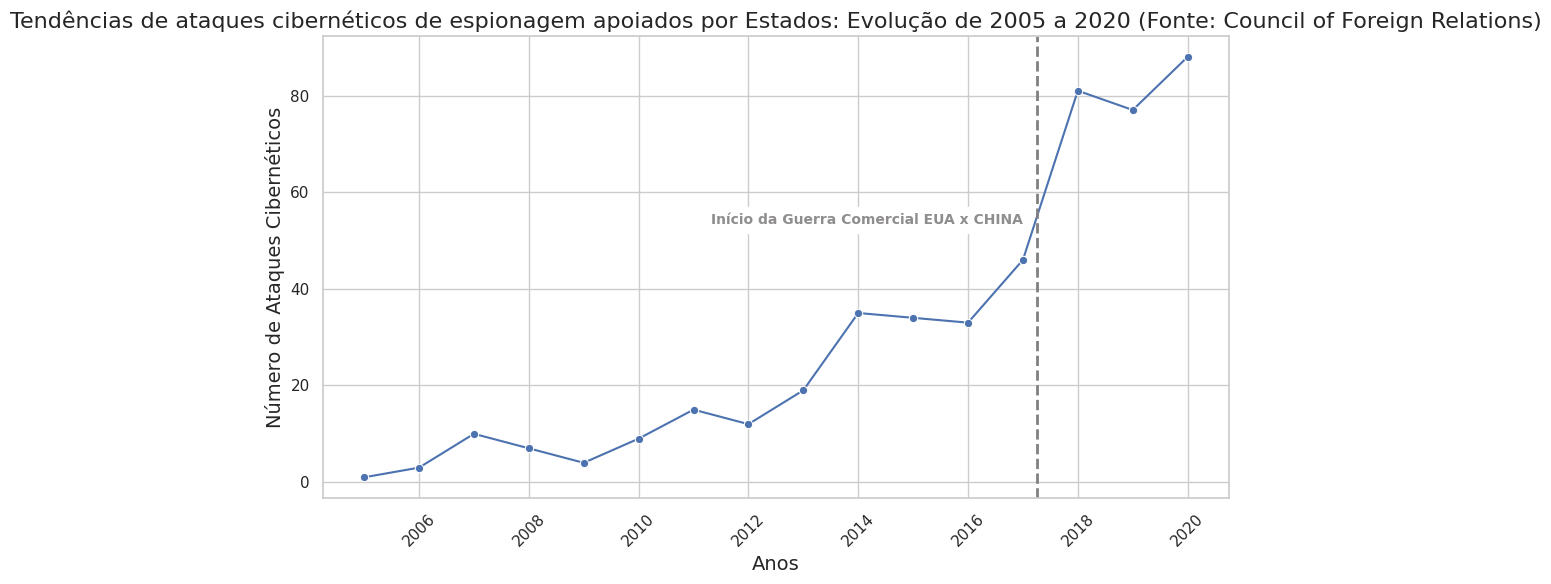

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub

# DATASET: https://www.kaggle.com/datasets/fireballbyedimyrnmom/cyber-incidents-up-to-2020
caminho_dados = kagglehub.dataset_download("fireballbyedimyrnmom/cyber-incidents-up-to-2020", path='cyber-operations-incidents.csv')
dados = pd.read_csv(caminho_dados)

dados['Data'] = pd.to_datetime(dados['Date'], errors='coerce')
dados = dados.dropna(subset=['Data'])  # invalidas
dados['Ano'] = dados['Data'].dt.year

ataques_por_ano = dados['Ano'].value_counts().sort_index()

ataques_por_ano_df = ataques_por_ano.reset_index()
ataques_por_ano_df.columns = ['Ano', 'Quantidade_Ataques']

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=ataques_por_ano_df, x='Ano', y='Quantidade_Ataques', marker='o')

posicao_linha_guerra = 2017 + (3 / 12)  # março de 2018, guerra comercial eua x china
plt.axvline(x=posicao_linha_guerra, color='grey', linestyle='--', linewidth=2)

plt.text(posicao_linha_guerra - 0.25, max(ataques_por_ano_df['Quantidade_Ataques']) * 0.6,
         'Início da Guerra Comercial EUA x CHINA', color='#8f8d8d', fontsize=10,
         ha='right', va='bottom', fontweight='bold', rotation=0,
         bbox=dict(facecolor='white', edgecolor='white'))

plt.title('Tendências de ataques cibernéticos de espionagem apoiados por Estados: Evolução de 2005 a 2020 (Fonte: Council of Foreign Relations)', fontsize=16)
plt.xlabel('Anos', fontsize=14)
plt.ylabel('Número de Ataques Cibernéticos', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
